In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pytorch_model import OrigamiNetwork
import matplotlib.pyplot as plt
import numpy as np

In [3]:
digits = load_digits()
X = digits.data 
y = digits.target

X = X.astype('float32')
y = y.astype('int64')

X /= 16.0 


X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)

model = OrigamiNetwork(
    n_layers=3,
    width=X.shape[1],
    epochs=300,
    learning_rate=0.01,
    sigmoid=True,
    crease=5,
    optimizer_type="adam",
    batch_size=32
)

# Train the model
model.fit(X_train, y_train, X_val, y_val)

# Evaluate on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")



model.fold_history[-1]

/Users/jeddybennett/Documents/FoldAndCutNetworks/pytorch_model.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


Validation Accuracy: 0.8306
Validation Accuracy: 0.9056
Validation Accuracy: 0.9194
Validation Accuracy: 0.9389
Validation Accuracy: 0.9278
Validation Accuracy: 0.9389
Validation Accuracy: 0.9444
Validation Accuracy: 0.9500
Validation Accuracy: 0.9528
Validation Accuracy: 0.9528
Validation Accuracy: 0.9500
Validation Accuracy: 0.9528
Validation Accuracy: 0.9500
Validation Accuracy: 0.9500
Validation Accuracy: 0.9528
Validation Accuracy: 0.9528
Validation Accuracy: 0.9556
Validation Accuracy: 0.9528
Validation Accuracy: 0.9500
Validation Accuracy: 0.9528
Validation Accuracy: 0.9611
Validation Accuracy: 0.9556
Validation Accuracy: 0.9611
Validation Accuracy: 0.9583
Validation Accuracy: 0.9583
Validation Accuracy: 0.9639
Validation Accuracy: 0.9611
Validation Accuracy: 0.9611
Validation Accuracy: 0.9583
Validation Accuracy: 0.9583
Validation Accuracy: 0.9667
Validation Accuracy: 0.9583
Validation Accuracy: 0.9556
Validation Accuracy: 0.9583
Validation Accuracy: 0.9611
Validation Accuracy:

Validation Accuracy: 0.9667
Validation Accuracy: 0.9667
Validation Accuracy: 0.9667
Validation Accuracy: 0.9667
Validation Accuracy: 0.9694
Test Accuracy: 0.9583


[array([-0.3831874 ,  0.09054917,  0.04647085,  0.10370057, -0.03747057,
        -0.04247805,  0.08714859, -0.21026637, -0.19348256,  0.01761262,
         0.0266202 ,  0.34623432,  0.00398409, -0.20674756,  0.13213696,
         0.06272168, -0.20773777, -0.23922671,  0.03914506,  0.3451779 ,
         0.36877   , -0.15912898, -0.21685769, -0.06004067,  0.2507462 ,
        -0.1078156 , -0.04520132,  0.0891826 ,  0.14843169, -0.07636037,
        -0.06851505,  0.31044284, -0.24822761, -0.08829396, -0.13092668,
         0.12077017, -0.17119162, -0.05128994, -0.3263957 , -0.18321416,
        -0.07030408,  0.13595383, -0.02142921, -0.04378325, -0.0193738 ,
        -0.3153836 , -0.29263127, -0.3034145 , -0.01558453, -0.28581977,
         0.03305681, -0.08763706,  0.03354872, -0.07127403,  0.05438217,
         0.20901294, -0.37168458,  0.06004552,  0.4846248 , -0.0129196 ,
        -0.10744579,  0.15523124, -0.00940078,  0.0152933 ], dtype=float32),
 array([ 0.21251652, -0.18551062, -0.13163002, 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Preprocess
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train model
model = OrigamiNetwork(n_layers=4, width=10, epochs=300,learning_rate = 0.001, optimizer_type = 'adam')
model.fit(X_train, y_train, X_val, y_val)

#Evaluate on validation set
y_pred = model.predict(X_val)
test_accuracy = accuracy_score(y_val, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

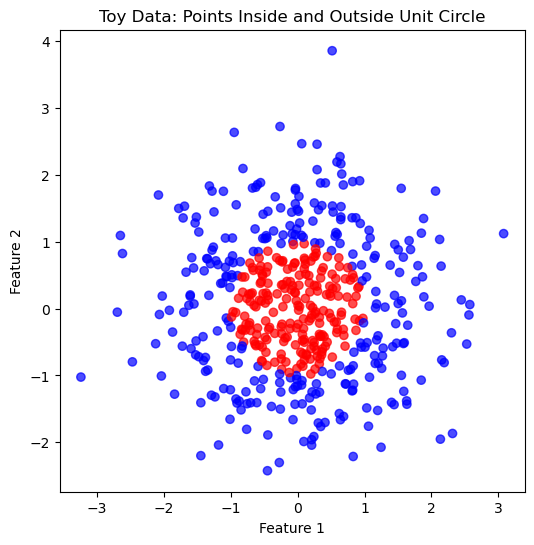

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

width = 2
# Generate random points in 2D space
X = np.random.randn(n_samples, width)

# Labels: Points inside the unit circle are labeled True (1), others False (0)
y = (np.linalg.norm(X, axis=1) < 1).astype(int)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title('Toy Data: Points Inside and Outside Unit Circle')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

In [3]:
# Split data: 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
layers = 4
model = OrigamiNetwork(
    n_layers=layers,
    width=2,
    epochs=1000,
    learning_rate=0.01,
    sigmoid=False,  # Set to True if you want to use the sigmoid fold
    crease=5,
    optimizer_type='sgd',  # Use 'sgd' or 'adam'
    batch_size=32,
    leak = 0.1
)

In [5]:
model.fit(X,y)

/Users/jeddybennett/Documents/FoldAndCutNetworks/pytorch_model.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


Visualizing folds at Layer 0


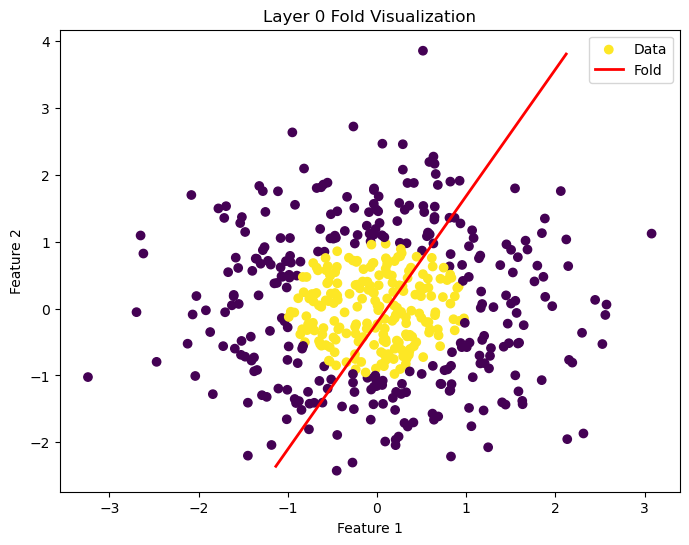

Visualizing folds at Layer 1


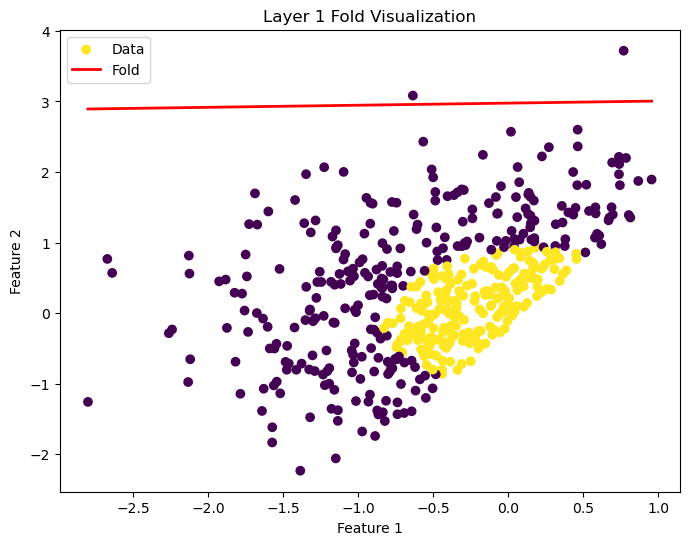

Visualizing folds at Layer 2


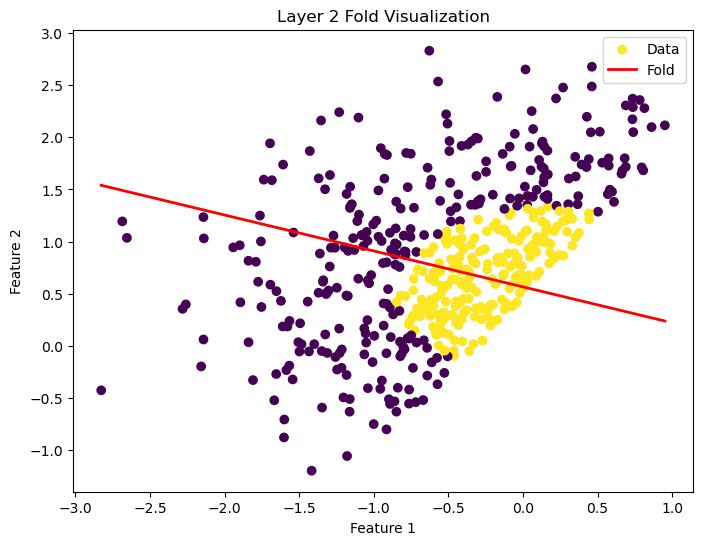

Visualizing folds at Layer 3


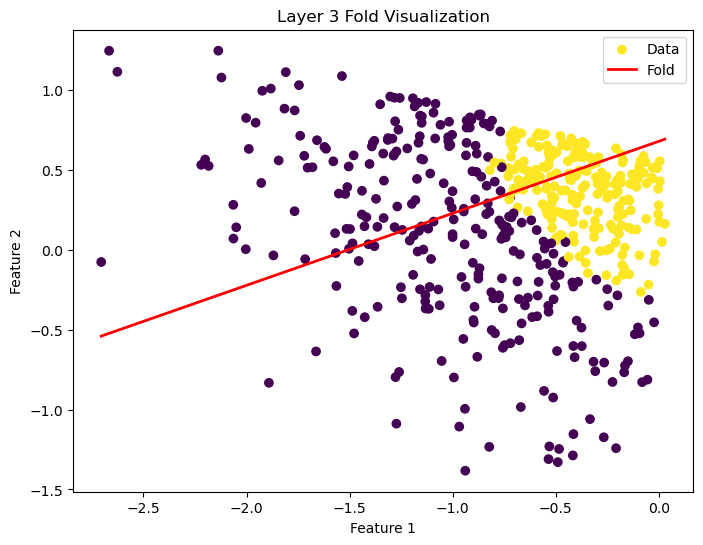

In [6]:
# Visualize folds at each layer
for layer_index in range(layers):
    print(f"Visualizing folds at Layer {layer_index}")
    model.plot_folds(X, y, layer_index=layer_index, use_plotly=False)

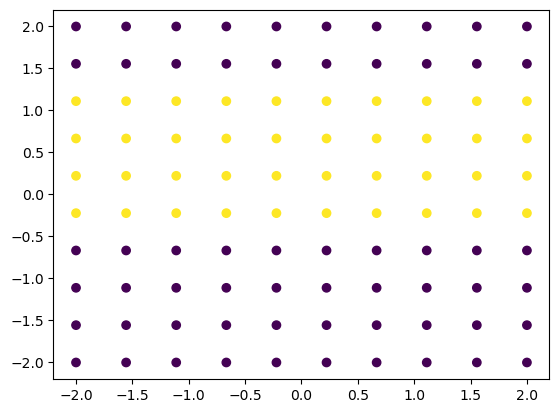

In [7]:
def layer_sam(D, n):
    scales = (D@n)/np.dot(n, n)
    mask = scales > 1
    return D + mask[:,np.newaxis] * (2*n - (2 * np.outer(scales, n)))
fv1 = np.array([0,.5])
size = 10
X1, X2 = np.meshgrid(np.linspace(-2,2,size), np.linspace(-2,2,size))
pairs = np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis=1)
Y = layer_sam(pairs, fv1)[:,1] > -.5
plt.scatter(pairs[:,0], pairs[:,1], c=Y)

In [8]:
model.fit(pairs, Y)

/Users/jeddybennett/Documents/FoldAndCutNetworks/pytorch_model.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


Visualizing folds at Layer 0


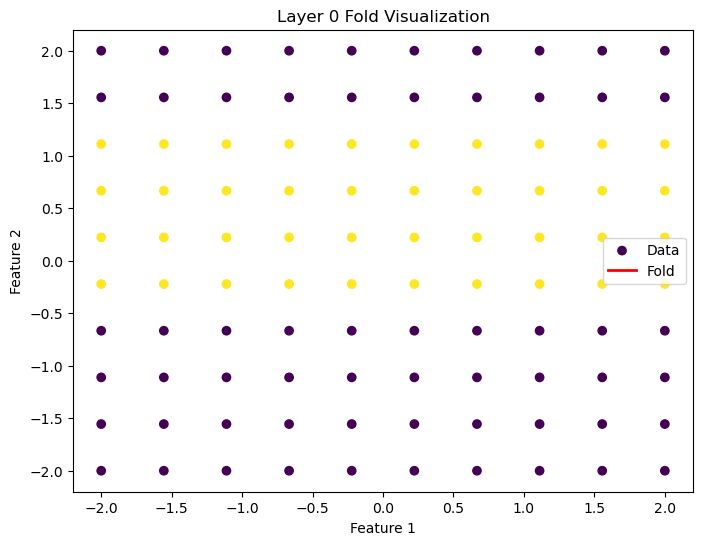

Visualizing folds at Layer 1


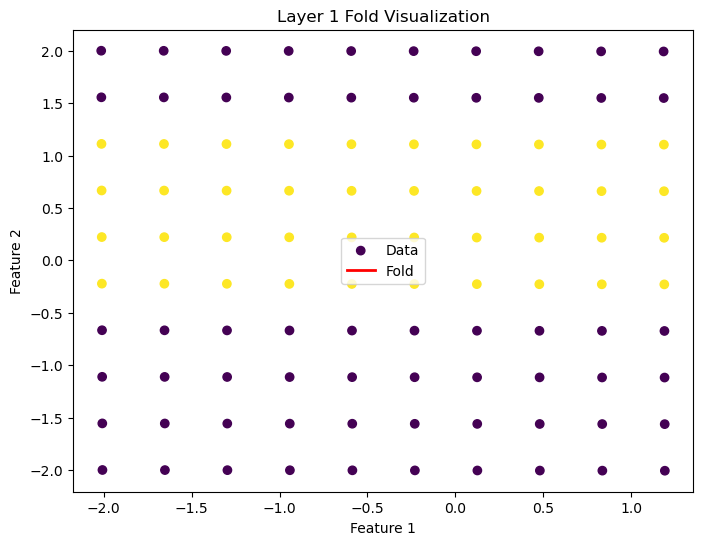

Visualizing folds at Layer 2


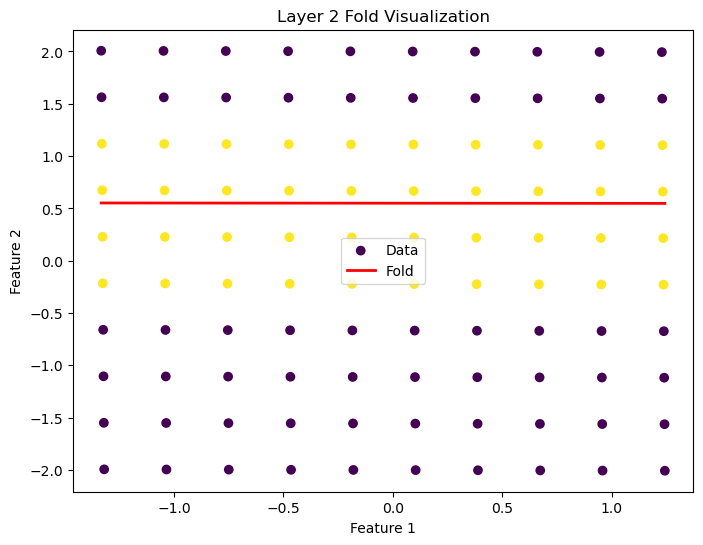

Visualizing folds at Layer 3


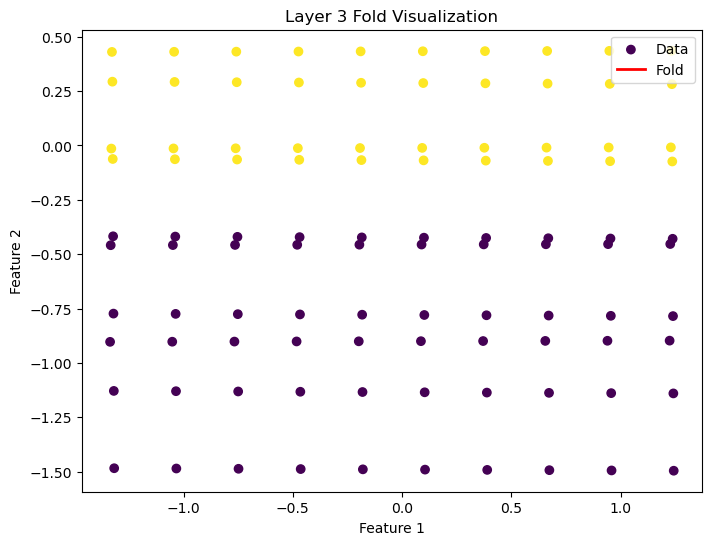

In [11]:
# Visualize folds at each layer
for layer_index in range(layers):
    print(f"Visualizing folds at Layer {layer_index}")
    model.plot_folds(pairs, Y, layer_index=layer_index, use_plotly=False)